<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/Proporcao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
notas = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/notas%20(2).csv')
notas.head(2)

,Curso,Alunos,AP1,AP2,AP3,Nota,Conceito
0,ADM,João,9.0,8.0,9.0,8.6,B
1,ADM,Maria,6.0,4.0,10.0,6.0,D


In [ ]:
qtdalunos_por_curso = notas.groupby('Curso').count()['Alunos']
qtdalunos_por_curso

Curso
ADM    6
DIR    4
ECO    2
Name: Alunos, dtype: int64

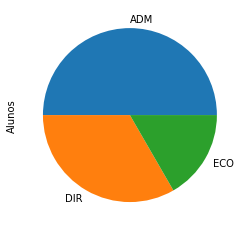

In [ ]:
qtdalunos_por_curso.plot(kind='pie')

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R 
notas<-read.csv("https://quant-ibmec.group/notas.csv")
notas

   Curso  Alunos  AP1  AP2  AP3 Nota Conceito
1    ADM    João  9.0  8.0  9.0  8.6        B
2    ADM   Maria  6.0  4.0 10.0  6.0        D
3    DIR    José  4.0  3.0  4.0  3.6        F
4    ADM   Pedro  8.0 10.0  7.0  8.6        B
5    ECO   Paulo  7.5  8.0  9.5  8.1        B
6    DIR  Esther  6.0  4.5  6.0  5.4        D
7    ADM Gabriel  8.0  6.0  8.0  7.2        B
8    DIR  Rafael  7.5 10.0  9.5  8.9        B
9    ECO    Davi  6.0 10.0  7.0  7.8        B
10   DIR  Silvio 10.0  9.5  9.5  9.7        A
11   ADM   Sofia  8.0  7.0  6.0  7.2        B
12   ADM  Raquel  4.5  4.0  4.0  4.2        F


In [ ]:
%%R
qtdalunos_por_curso <- tapply(notas$Alunos,notas$Curso,NROW)  
qtdalunos_por_curso

     ADM DIR ECO
[1,]   6   4   2


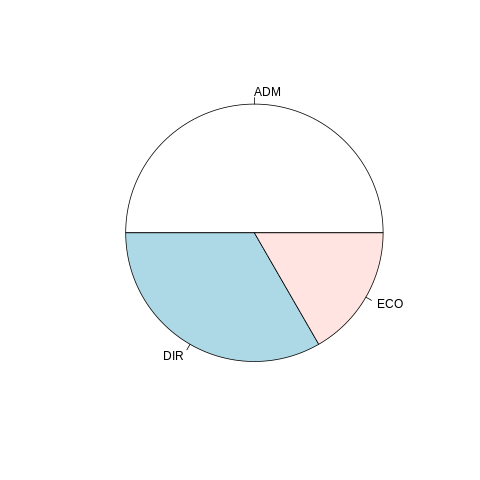

In [ ]:
%%R
pie(qtdalunos_por_curso)

In [ ]:
%%R
install.packages("dplyr")
install.packages("ggplot2")
install.packages("readr")
library(readr)
library(dplyr)
library(ggplot2) 

In [ ]:
%%R 
notas<-read_csv("https://quant-ibmec.group/notas.csv")
notas

Rows: 12 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Curso, Alunos, Conceito
dbl (4): AP1, AP2, AP3, Nota

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 12 × 7
   Curso Alunos    AP1   AP2   AP3  Nota Conceito
   <chr> <chr>   <dbl> <dbl> <dbl> <dbl> <chr>   
 1 ADM   João      9     8     9     8.6 B       
 2 ADM   Maria     6     4    10     6   D       
 3 DIR   José      4     3     4     3.6 F       
 4 ADM   Pedro     8    10     7     8.6 B       
 5 ECO   Paulo     7.5   8     9.5   8.1 B       
 6 DIR   Esther    6     4.5   6     5.4 D       
 7 ADM   Gabriel   8     6     8     7.2 B       
 8 DIR   Rafael    7.5  10     9.5   8.9 B       
 9 ECO   Davi      6    10     7     7.8 B       
10 DIR   Silvio   10     9.5   9.5   9.7 A       
11 ADM   Sofia     8     7     6     7.2 B      

In [ ]:
%%R
alunos_por_curso <- notas %>% group_by(Curso) %>% summarize(qtd = NROW(Curso))
alunos_por_curso

# A tibble: 3 × 2
  Curso   qtd
  <chr> <int>
1 ADM       6
2 DIR       4
3 ECO       2


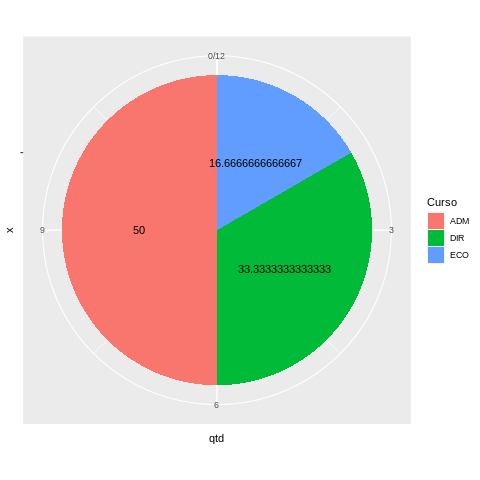

In [ ]:
%%R
ggplot(data=alunos_por_curso,aes(x="",y=qtd,fill=Curso)) + 
  geom_bar(stat='identity') +
  coord_polar("y") +
  geom_text(aes(label = qtd/sum(qtd)*100),position=position_stack(vjust = 0.5) )